# House Price Prediction : Advanced Regression - Assignment

## Problem Statement - 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

Required to model the price of houses with the available independent variables.

This model will then be used by the management to understand how exactly the prices vary with the variables. 
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Approach to solve this business problem

- Importing Libraries
- Loading data
- Data Understanding
- Exploratory Data Analysis ( EDA )
- Data Preperation
- Training the model
- Model Prediction and Evaluation
- Redge and Lasso Regularization
- Conclusions and Results

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
# loading tain.csv data as dataframe
house = pd.read_csv('train.csv')
house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

### Data Understanding

In [3]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Columns list in the data
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# shape of dataframe
house.shape

(1460, 81)

In [6]:
# Columns data type details
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Describing the data
house.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
99%       1.000000      5.000000      2.000000     11.000000     2.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   

### Exploratory Data Analysis ( EDA )

In this step we will explore the data, clean it by dropping columns with high Nulls and imputation and make it ready for buiding model.

* **Checking Duplicate Rows**

In [8]:
house.duplicated().sum()

0

* **Checking Nulls**

In [9]:
# Checking for percentage nulls
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [10]:
# Dropping Colums having more than 45% nulls
house.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [11]:
house.shape

(1460, 76)

In [12]:
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)[round(100*(house.isnull().sum()/len(house.index)), 2)>0]

LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

* **Imputation - According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price. Hence, we will first impute the categorical variables with 'None'**


In [13]:
#As mentioned in the Data Dictionary NA value means it is not present and thus we can replace it with none
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    house[i].fillna("none", inplace=True)

In [14]:
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)[round(100*(house.isnull().sum()/len(house.index)), 2)>0]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [15]:
# We will replace the null with median for LotFrontage MasVnrArea and GarageYrBlt columns
house["LotFrontage"].fillna(house["LotFrontage"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)

# Filling the Electrical with the mode
house['Electrical'] = house['Electrical'].fillna(house['Electrical'].mode()[0])

In [16]:
# Checking if any Nulls left
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)[round(100*(house.isnull().sum()/len(house.index)), 2)>0]

Series([], dtype: float64)

**Observation** :- All NULLS are handled and there's no such value present in data.

In [17]:
# Now dropping the ID column as it cannot be used for analysis
house.drop(['Id'], axis=1, inplace=True)

In [18]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [19]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [20]:
house.shape

(1460, 75)

In [21]:
house.describe([0.25,0.50,0.75,0.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
99%    2009.000000   2009.000000   791.280000  1572.410000   830.380000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
99%    1797.050000  2155.050000  2219.460000  1418.920000    360.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
99%    3123.480000      2.000000      1.000000     3.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.589041   
std        0.815778      0.220338      1.625393     0.644666    23.997022   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
99%        5.000000      2.000000     11.000000     2.000000  2009.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274    

### Creating Derived Variables

In [22]:
# Creating derived column for Total_sqr_footage as overall area for all floors and basement plays an important role
house['Total_sqr_footage'] = (house['BsmtFinSF1'] + house['BsmtFinSF2'] + house['1stFlrSF'] + house['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
house['Total_Bathrooms'] = (house['FullBath'] + (0.5 * house['HalfBath']) + house['BsmtFullBath'] + (0.5 * house['BsmtHalfBath']))
# Creating derived column for total porch area 
house['Total_porch_sf'] = (house['OpenPorchSF'] + house['3SsnPorch'] + house['EnclosedPorch'] + house['ScreenPorch'] + house['WoodDeckSF'])


In [23]:
# Remove the extra columns for which columns Total_sqr_footage, Total_Bathrooms, Total_porch_sf have been derived
house.drop(['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'], axis=1, inplace=True)

In [24]:
# Creating a new Column to determine the age of the property
house['Total_Age']= house['YrSold'] - house['YearBuilt']
house['Garage_age'] = house['YrSold'] - house['GarageYrBlt']
house['Remodel_age'] = house['YrSold'] - house['YearRemodAdd']

In [25]:
# Now drop out variables like GarageYrBlt and YearRemodAdd as we are already calculating the number of years
house.drop(labels = ['GarageYrBlt','YearRemodAdd'], axis = 1, inplace=True)

### Checking Unique value counts in each column

In [26]:
for i in house.columns :
    print(i,"\n")
    print(house[i].value_counts(),"\n")
    print("----------------------------------")

MSSubClass 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

----------------------------------
MSZoning 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

----------------------------------
LotFrontage 

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 

----------------------------------
LotArea 

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 

----------------------------------
Street 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

----------------------------------
LotShape 

Reg    925
IR1    484
IR2  

**Observation** :- many variables/columns have only 1 value with maximum frequency

lets drops the columns where the highest frequeny is >= 90%

In [27]:
dropCols = [] 
for i in house.columns :
    if house[i].value_counts().max() >= len(house)*0.90:
        dropCols.append(i)
print(dropCols)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [28]:
# Removing these columns
house.drop(dropCols,axis=1,inplace=True)

In [29]:
house.shape

(1460, 51)

#### All numeric (float and int) variables in the dataset

In [30]:
data_numeric = house.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  \
0       196.0        150          856       1710             3             8   
1         0.0        284         1262       1262             3             6   
2       162.0        434          920       1786             3             6   
3         0.0        540          756       1717             3             7   
4       350.0        490         1145       2198             4             9   

   Fireplaces  GarageCars  GarageArea  MoSold  YrSold  SalePrice  \
0           0           2         548       2    2008     208500   
1           1           2         460       5    2007     181500   
2           1           2         608       9    2008     223500   
3           1           3         642       2    2006     140000   
4           1           3         836      12    2008     250000   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  Total_Age  Garage_age  \
0               2416              3.5              61          5         5.0   
1               2240              2.5             298         31        31.0   
2               2272              3.5              42          7         7.0   
3               1933              2.0             307         91         8.0   
4               2853              3.5             276          8         8.0   

   Remodel_age  
0            5  
1           31  
2            6  
3           36  
4            8

In [31]:
# numeric columns
print("Number of Numeric Columns : ",len(data_numeric.columns))
data_numeric.columns

Number of Numeric Columns :  24


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage',
       'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age',
       'Remodel_age'],
      dtype='object')

#### All category variables in the dataset

In [32]:
data_category = house.select_dtypes(include=['object'])
data_category.head()

MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType  \
0       RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam   
1       RL      Reg         Lvl       FR2      Veenker      Feedr     1Fam   
2       RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam   
3       RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam   
4       RL      IR1         Lvl       FR2      NoRidge       Norm     1Fam   

  HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd        TA   
1     1Story     Gable     MetalSd     MetalSd       None        TA        TA   
2     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd        TA   
3     2Story     Gable     Wd Sdng     Wd Shng       None        TA        TA   
4     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0      PConc       Gd       TA           No          GLQ          Unf   
1     CBlock       Gd       TA           Gd          ALQ          Unf   
2      PConc       Gd       TA           Mn          GLQ          Unf   
3     BrkTil       TA       Gd           No          ALQ          Unf   
4      PConc       Gd       TA           Av          GLQ          Unf   

  HeatingQC KitchenQual GarageType GarageFinish GarageQual SaleType  \
0        Ex          Gd     Attchd          RFn         TA       WD   
1        Ex          TA     Attchd          RFn         TA       WD   
2        Ex          Gd     Attchd          RFn         TA       WD   
3        Gd          Gd     Detchd          Unf         TA       WD   
4        Ex          Gd     Attchd          RFn         TA       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [33]:
# categorical columns
print("Number of categorical Columns : ",len(data_category.columns))
data_category.columns

Number of categorical Columns :  27


Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Univariate Analysis of all columns

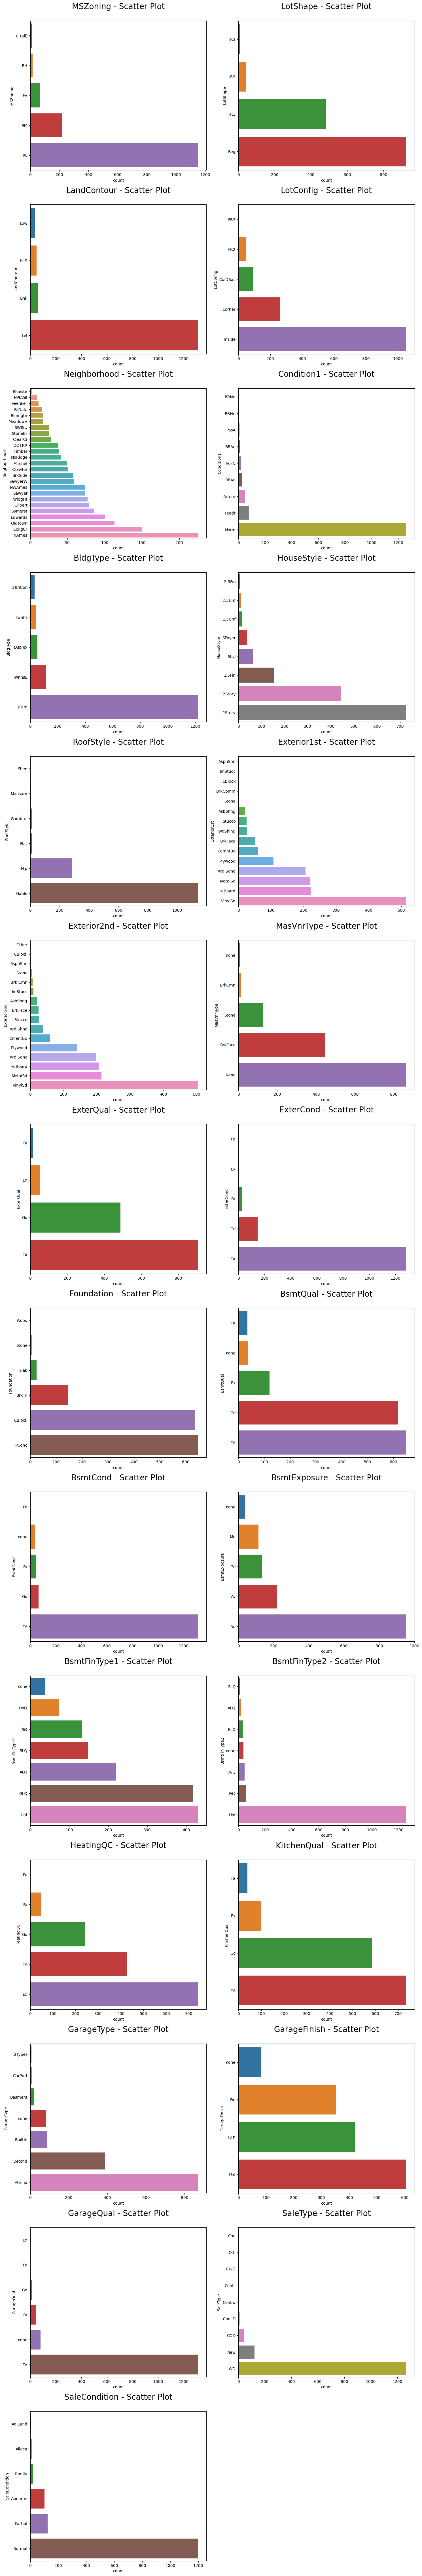

In [41]:
#Lets plot all the categorical columns
plt.figure(figsize=(15,110))#The size of the plot
pos = 0
for i in data_category.columns:
    pos = pos+1
    plt.subplot(17,2,pos)
    sns.countplot(y=house[str(i)], order=house[str(i)].value_counts().sort_values().index)
    plt.title(str(i)+" - Scatter Plot\n",fontsize=20)
plt.tight_layout()
plt.show()

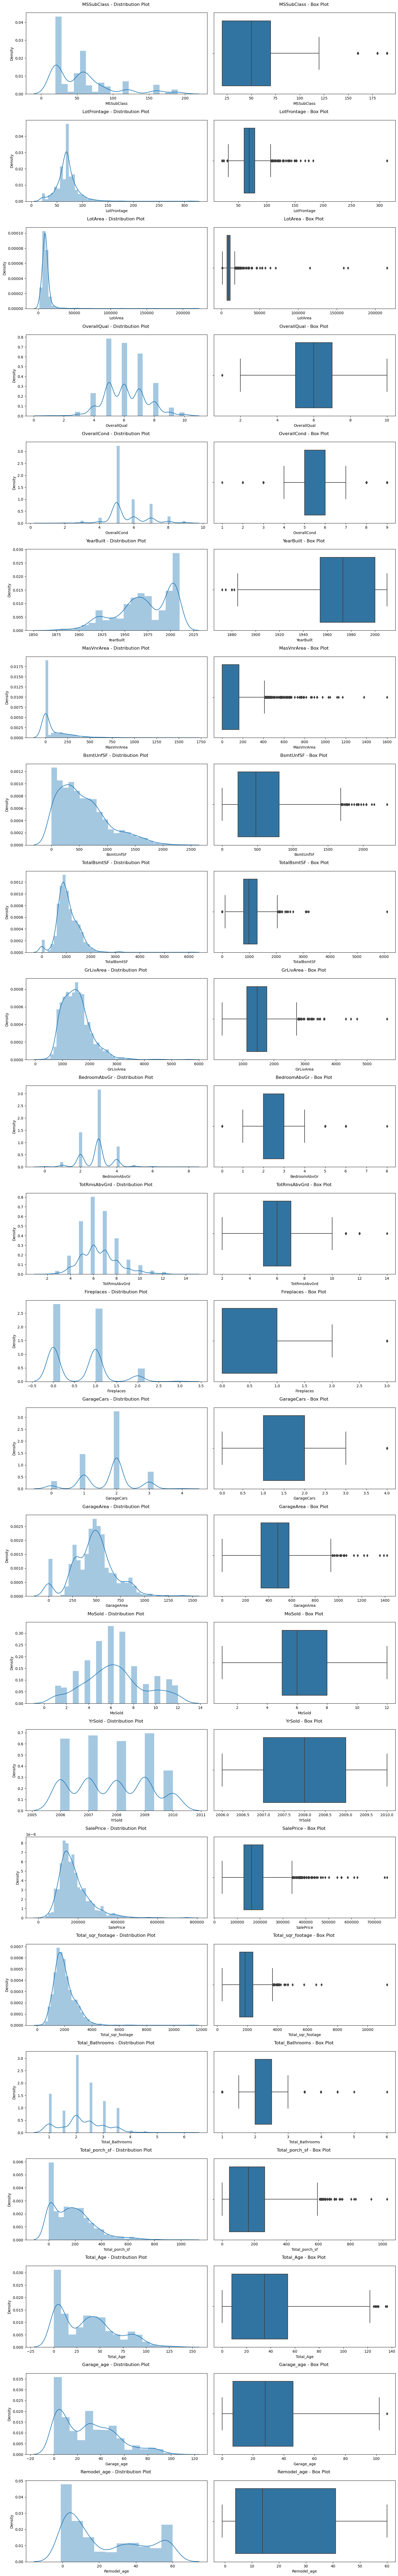

In [48]:
#Lets plot all the numerical columns and observe the outliers
plt.figure(figsize=(15,100))
pos=0
for i in data_numeric.columns:
    pos=pos+1
    plt.subplot(25,2,pos)
    plt.title(str(i)+" - Distribution Plot \n")
    sns.distplot(house[str(i)])
    pos=pos+1
    plt.subplot(25,2,pos)
    plt.title(str(i)+" - Box Plot \n")
    sns.boxplot(house[str(i)])
plt.tight_layout()
plt.show()

In [54]:
#As we can observe there are outlier in many columns, listing them below
outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_sqr_footage','Total_porch_sf']
for i in outlier:
    qnt = house[i].quantile(0.98)#removing data above 98 percentile
    house = house[house[i] < qnt]

In [55]:
house.shape

(1290, 51)

**Observation** :- We can see Outliers in some morevariables but we will not drop them since this may lead to data loss , the outliers will be treated during min-max ( normalisation ) scaling as handling outliers could lead us to data loss

### Bivariate Analysis of all columns

Target Variable is `SalePrice` and will be compared with other variables

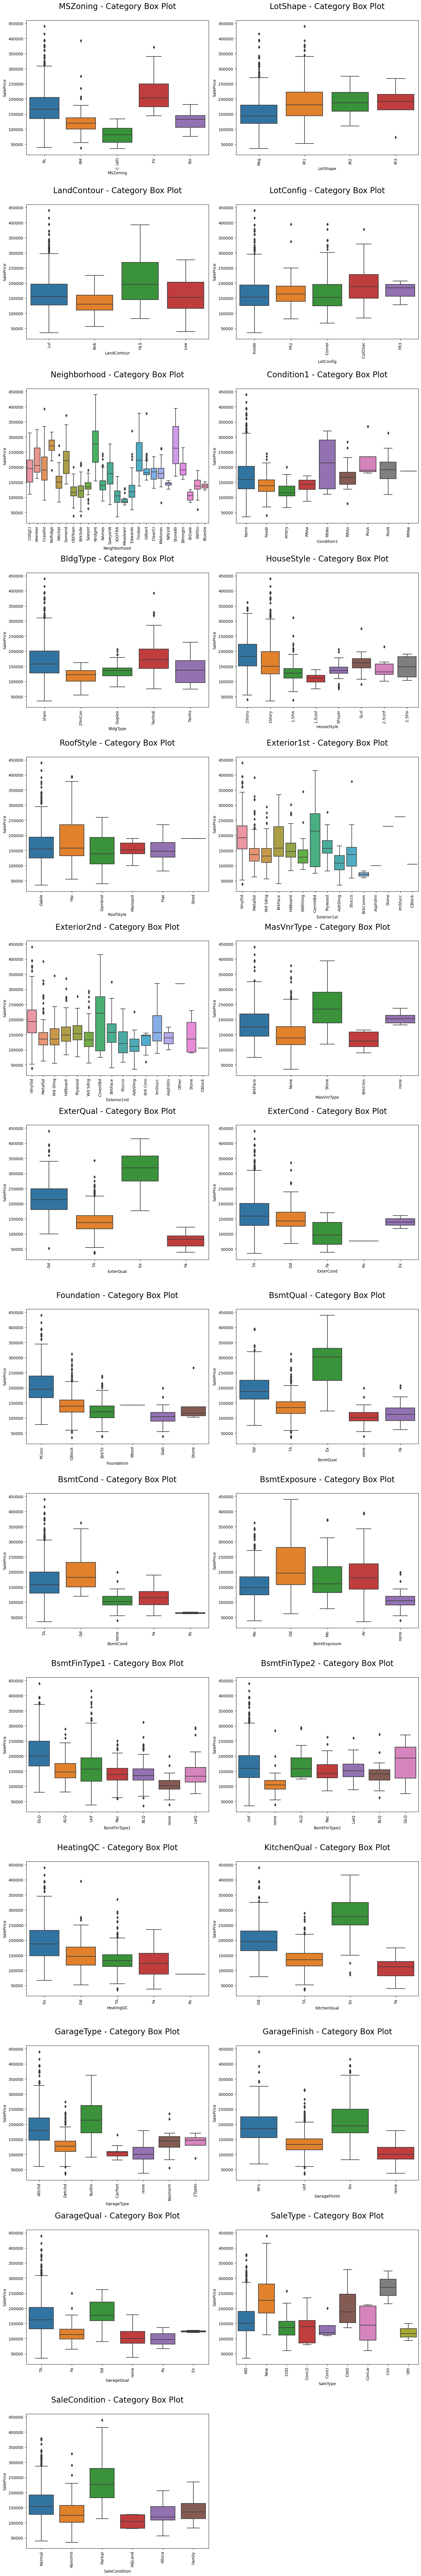

In [63]:
#Lets plot all the categorical columns
plt.figure(figsize=(15,110))
pos = 0
for i in data_category.columns:
    pos = pos+1
    plt.subplot(17,2,pos)
    sns.boxplot(x=house[str(i)], y="SalePrice", data=house)
    x=plt.xticks(rotation=90)
    plt.title(str(i)+" - Category Box Plot\n",fontsize=20)
plt.tight_layout()
plt.show()

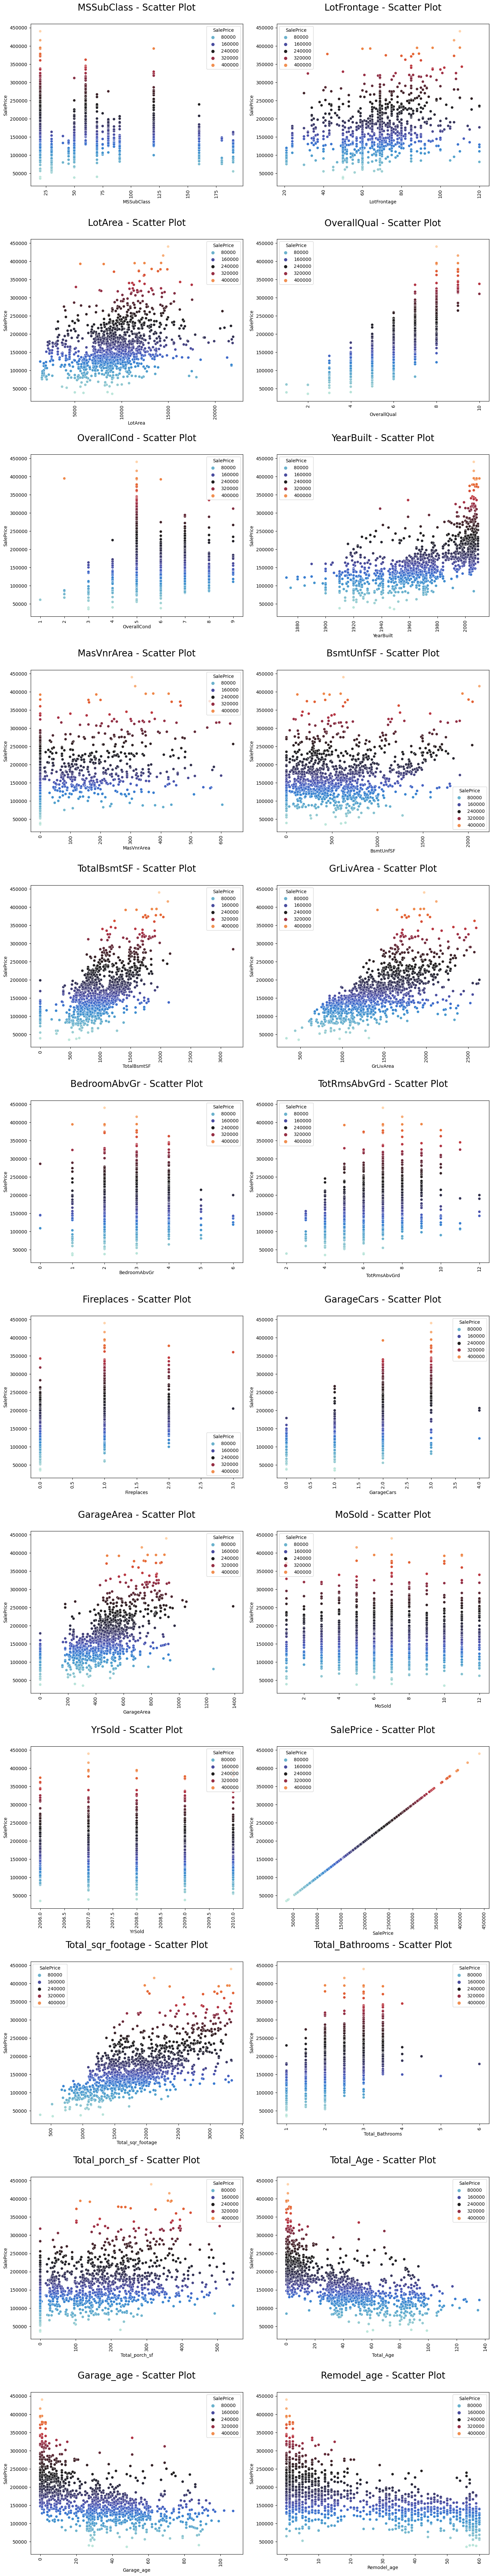

In [61]:
#Lets plot all the numerical columns
plt.figure(figsize=(15,110))
pos = 0
for i in data_numeric.columns:
    pos = pos+1
    plt.subplot(17,2,pos)
    sns.scatterplot(x=house[str(i)], y="SalePrice", data=house, hue='SalePrice', palette='icefire')
    plt.xticks(rotation=90)
    plt.title(str(i)+" - Scatter Plot\n",fontsize=20)
plt.tight_layout()
plt.show()

**Observations** :-

- We can observe that the **`SalesPrice`** increses with the increase of **`Total_sqr_footage`** and that is natural
- We can observe that the **`SalesPrice`** increses with the increase of **`GrLivArea`**

### Multivariate Analysis of the all columns

In [64]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(house.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

**Observations** :-
- **`GarageArea`** and **`GarageCars`** have a strong correlation since both are describing the size.
- **`TotRmsAbvGrd`** and **`GrLivArea`** have a strong correlation
- **`GarageAge`** and **`TotalAge`** also have a strong correlation

In [65]:
#Also lets find out which variables has high correlation with SalesPrice
house.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice            1.00
OverallQual          0.80
Total_sqr_footage    0.67
GrLivArea            0.65
GarageCars           0.64
YearBuilt            0.62
GarageArea           0.62
TotalBsmtSF          0.61
Total_Bathrooms      0.61
Fireplaces           0.44
TotRmsAbvGrd         0.43
MasVnrArea           0.39
Total_porch_sf       0.36
LotArea              0.35
LotFrontage          0.34
BsmtUnfSF            0.26
BedroomAbvGr         0.13
MoSold               0.10
YrSold              -0.03
MSSubClass          -0.08
OverallCond         -0.10
Garage_age          -0.53
Remodel_age         -0.56
Total_Age           -0.62
Name: SalePrice, dtype: float64

**Observations**:-

**`SalesPrice`** is mostly corelated with variables like **`OverallQual`**, **`GrLivArea`**, **`Total_sqr_footage`** and **`GarageCars`**

### Data Preparation

Data preparation has 3 main steps :
1. Creating Dummy Variables
3. Dividing the data in terms of Train and Test
2. Scaling on the Continous variables of Train data

### Creating Dummy Variables for Categorical Columns

In [67]:
# creating dummy variables
# Setting drop_first as True to drop the 1st dummy variable of each categorical column to increases the efficiency of the model
house = pd.get_dummies(house,drop_first=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1458
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(165)
memory usage: 459.8 KB


In [68]:
house.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  \
0       196.0        150          856       1710             3             8   
1         0.0        284         1262       1262             3             6   
2       162.0        434          920       1786             3             6   
3         0.0        540          756       1717             3             7   
4       350.0        490         1145       2198             4             9   

   Fireplaces  GarageCars  GarageArea  MoSold  YrSold  SalePrice  \
0           0           2         548       2    2008     208500   
1           1           2         460       5    2007     181500   
2           1           2         608       9    2008     223500   
3           1           3         642       2    2006     140000   
4           1           3         836      12    2008     250000   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  Total_Age  Garage_age  \
0               2416              3.5              61          5         5.0   
1               2240              2.5             298         31        31.0   
2               2272              3.5              42          7         7.0   
3               1933              2.0             307         91         8.0   
4               2853              3.5             276          8         8.0   

   Remodel_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0            5            0            0            1            0   
1           31            0            0            1            0   
2            6            0            0            1            0   
3           36            0            0            1            0   
4            8            0            0            1            0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 1                     0                    0   
1                 0                     0                    0   
2                 1                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_

In [69]:
#Lets check the updated Dataset in terms of percentile
house.describe([0.25,0.50,0.75,0.99])

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1290.000000  1290.000000   1290.000000  1290.000000  1290.000000   
mean     57.414729    67.135659   9172.652713     5.957364     5.575194   
std      43.229350    17.234819   3382.298199     1.287481     1.106160   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
25%      20.000000    60.000000   7200.000000     5.000000     5.000000   
50%      50.000000    69.000000   9100.000000     6.000000     5.000000   
75%      70.000000    75.000000  11002.250000     7.000000     6.000000   
99%     190.000000   111.110000  18934.660000     9.000000     9.000000   
max     190.000000   120.000000  21930.000000    10.000000     9.000000   

         YearBuilt   MasVnrArea    BsmtUnfSF  TotalBsmtSF    GrLivArea  \
count  1290.000000  1290.000000  1290.000000  1290.000000  1290.000000   
mean   1970.429457    81.151163   563.310078  1004.504651  1424.022481   
std      30.079183   131.331451   433.622435   380.443649   412.074577   
min    1872.000000     0.000000     0.000000     0.000000   334.000000   
25%    1952.000000     0.000000   219.250000   780.000000  1098.250000   
50%    1971.500000     0.000000   484.500000   953.000000  1395.500000   
75%    2000.000000   136.000000   803.750000  1218.750000  1700.750000   
99%    2009.000000   516.080000  1768.660000  1923.100000  2484.420000   
max    2010.000000   640.000000  2121.000000  3206.000000  2634.000000   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1290.000000   1290.000000  1290.000000  1290.000000  1290.000000   
mean       2.821705      6.309302     0.546512     1.699225   451.386822   
std        0.775394      1.449322     0.612584     0.727014   201.943743   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        2.000000      5.000000     0.000000     1.000000   308.000000   
50%        3.000000      6.000000     0.000000     2.000000   462.000000   
75%        3.000000      7.000000     1.000000     2.000000   564.750000   
99%        5.000000     10.000000     2.000000     3.000000   923.110000   
max        6.000000     12.000000     3.000000     4.000000  1390.000000   

            MoSold       YrSold      SalePrice  Total_sqr_footage  \
count  1290.000000  1290.000000    1290.000000        1290.000000   
mean      6.355039  2007.811628  167438.954264        1860.427907   
std       2.701520     1.323894   60739.709465         580.904376   
min       1.000000  2006.000000   35311.000000         334.000000   
25%       5.000000  2007.000000  127000.000000        1456.000000   
50%       6.000000  2008.000000  155000.000000        1792.000000   
75%       8.000000  2009.000000  196500.000000        2202.750000   
99%      12.000000  2010.000000  371045.640000        3269.760000   
max      12.000000  2010.000000  440000.000000        3359.000000   

       Total_Bathrooms  Total_porch_sf    Total_Age   Garage_age  Remodel_age  \
count      1290.000000     1290.000000  1290.000000  1290.000000  1290.000000   
mean          2.125581      158.955814    37.382171    29.914729    23.809302   
std           0.747198      127.945496    30.124677    24.125168    20.906476   
min           1.000000        0.000000     0.000000     0.000000     0.000000   
25%           1.500000       40.000000     8.000000     7.000000     4.000000   
50%           2.000000      149.000000    36.000000    29.000000    16.000000   
75%           2.500000      245.500000    56.000000    46.000000    43.000000   
99%           3.500000      484.440000   108.110000    90.110000    60.000000   
max           6.000000      544.000000   136.000000   107.000000    60.000000   

       MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
count  1290.000000  1290.000000  1290.000000  1290.000000   1290.000000   
mean      0.046512     0.011628     0.773643     0.161240      0.019380   
std       0.210672     0.107

In [70]:
house.shape

(1290, 189)

In [71]:
house = house.round(decimals = 2)

#### Dividing the Data in terms of TRAIN and TEST

In [73]:
# We will keep the train size as 70% and automatically test size will be rest 30%
# Also we will keep random_state as a fixed value of 100 so that the data set does no changes
df_train, df_test = train_test_split(house, train_size = 0.7, random_state = 100)
print ("Train data : ",df_train.shape)
print ("Test data : ",df_test.shape)

Train data :  (902, 189)
Test data :  (388, 189)


#### Scaling of Features

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

There are two common ways of rescaling:

1. `Min-Max scaling (normalisation): Between 0 and 1`
2. `Standardisation (mean-0, sigma-1)` 

This time, we will use MinMax scaling.

`normalisation:(x - xmin)/(xmax - xmin)`

`standardisation: (x - mu)/sigma`

In [74]:
# Min-Max scaling
# Instantiate and object
Scaler = MinMaxScaler()

In [76]:
#Lets extract the numerical columns from the df_train
Num_cols = []
for i in df_train.columns :
    if df_train[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [77]:
# Fit on Data
df_train[Num_cols] = Scaler.fit_transform(df_train[Num_cols])

In [79]:
df_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
715     0.000000     0.575758  0.423556     0.555556     0.428571   0.739130   
189     0.588235     0.202020  0.168484     0.777778     0.428571   0.934783   
1089    0.588235     0.161616  0.089913     0.777778     0.428571   0.963768   
422     0.000000     0.797980  0.991199     0.444444     0.428571   0.594203   
1451    0.000000     0.575758  0.380629     0.777778     0.428571   0.985507   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  BedroomAbvGr  \
715     0.276190   0.501650     0.331878   0.441739      0.500000   
189     0.000000   0.207449     0.496881   0.547391      0.000000   
1089    0.000000   0.098067     0.388958   0.396957      0.166667   
422     0.000000   0.465818     0.308172   0.284348      0.333333   
1451    0.307937   0.741631     0.490643   0.540870      0.500000   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea    MoSold  YrSold  \
715            0.5    0.333333        0.50    0.343885  0.636364    0.75   
189            0.3    0.333333        0.50    0.490647  0.636364    0.50   
1089           0.2    0.333333        0.50    0.395683  0.272727    0.00   
422            0.2    0.000000        0.50    0.374101  0.090909    0.50   
1451           0.5    0.333333        0.75    0.604317  0.363636    0.75   

      SalePrice  Total_sqr_footage  Total_Bathrooms  Total_porch_sf  \
715    0.320466           0.335868              0.2        0.000000   
189    0.619461           0.797355              0.3        0.632353   
1089   0.399539           0.645289              0.3        0.154412   
422    0.191972           0.216198              0.0        0.000000   
1451   0.622154           0.411240              0.2        0.066176   

      Total_Age  Garage_age  Remodel_age  MSZoning_FV  MSZoning_RH  \
715    0.257353    0.327103     0.583333            0            0   
189    0.051471    0.065421     0.100000            0            0   
1089   0.007353    0.009346     0.016667            1            0   
422    0.397059    0.504673     0.900000            0            0   
1451   0.007353    0.009346     0.000000            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
715             1            0             0             0             1   
189             1            0             0             0             1   
1089            0            0             0             0             0   
422             1            0             0             0             1   
1451            1            0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
715                 0                0                1                  0   
189                 0                0                1                  0   
1089                0                0                1                  0   
422                 1                0                0                  0   
1451                0                0                1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
715               0              0                 1                     0   
189               0              0                 1                     0   
1089              0              0                 1                     0   
422               0              0                 1                     0   
1451              0              0                 1                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
715                     0                     0                     0   
189                     0                     0                     0   
1089                    0                     0                     0   
422                     0                     0                     0   
1451                    0                    

In [80]:
#Inspect the data in percentile after min-max Scaling
df_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  902.000000   902.000000  902.000000   902.000000   902.000000   
mean     0.212860     0.468499    0.378431     0.550505     0.513145   
std      0.244419     0.166552    0.162891     0.145787     0.159550   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.393939    0.279812     0.444444     0.428571   
50%      0.176471     0.484848    0.373222     0.555556     0.428571   
75%      0.294118     0.545455    0.467560     0.666667     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  MasVnrArea   BsmtUnfSF  TotalBsmtSF   GrLivArea  \
count  902.000000  902.000000  902.000000   902.000000  902.000000   
mean     0.710555    0.127421    0.265488     0.313282    0.476659   
std      0.217767    0.210839    0.202934     0.121923    0.179894   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.572464    0.000000    0.102074     0.243294    0.339348   
50%      0.717391    0.000000    0.228901     0.296943    0.469565   
75%      0.927536    0.205556    0.383310     0.378665    0.598152   
max      1.000000    1.000000    1.000000     1.000000    1.000000   

       BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
count    902.000000    902.000000  902.000000  902.000000  902.000000   
mean       0.470990      0.433149    0.186253    0.422118    0.323455   
std        0.129466      0.147637    0.201849    0.180074    0.144953   
min        0.000000      0.000000    0.000000    0.000000    0.000000   
25%        0.333333      0.300000    0.000000    0.250000    0.221583   
50%        0.500000      0.400000    0.166667    0.500000    0.332014   
75%        0.500000      0.500000    0.333333    0.500000    0.405755   
max        1.000000      1.000000    1.000000    1.000000    1.000000   

           MoSold      YrSold   SalePrice  Total_sqr_footage  Total_Bathrooms  \
count  902.000000  902.000000  902.000000         902.000000       902.000000   
mean     0.478129    0.454545    0.328326           0.506899         0.223947   
std      0.245623    0.328977    0.150592           0.195825         0.148027   
min      0.000000    0.000000    0.000000           0.000000         0.000000   
25%      0.295455    0.250000    0.227802           0.368926         0.100000   
50%      0.454545    0.500000    0.295756           0.486612         0.200000   
75%      0.636364    0.750000    0.397068           0.620000         0.300000   
max      1.000000    1.000000    1.000000           1.000000         1.000000   

       Total_porch_sf   Total_Age  Garage_age  Remodel_age  MSZoning_FV  \
count      902.000000  902.000000  902.000000   902.000000   902.000000   
mean         0.297030    0.277659    0.286031     0.400148     0.043237   
std          0.235572    0.221172    0.228625     0.350900     0.203504   
min          0.000000    0.000000    0.000000     0.000000     0.000000   
25%          0.080882    0.058824    0.074766     0.066667     0.000000   
50%          0.284007    0.272059    0.271028     0.266667     0.000000   
75%          0.455882    0.419118    0.439252     0.733333     0.000000   
max          1.000000    1.000000    1.000000     1.000000     1.000000   

       MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
count   902.000000   902.000000   902.000000    902.000000    902.000000   
mean      0.011086     0.774945     0.162971      0.019956      0.003326   
std       0.104765     0.417851     0.369544      0.139925      0.057607   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     1.000000     0.000000      0.000000      0.000000   
50%       0.000000     1.000000     0.000000      0.000000      0.000000   
75%       0.000000     1.000000     0.000000      0.000000      0.000000   
max       1.000000     1.000000     1.000000      1.000

**Observation** :- 

All the continous variables are successfully scaled where the max value is 1 and min value is 0

### Training the Model

- To train a model we need to perform **Feature Selection** which are basically done by 3 ways :
    1. Manual Selection where each variable is selected 1 by 1.
    2. Manual Elimination where each variable is eliminated 1 by 1.
    3. Automated Process ( RFE )


- RFE or **Recursive Feature Elimination** is an automated approach of feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.


- Here we will use automation (RFE) process

In [81]:
# Defining X_train and y_train
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train

In [84]:
X_train.shape

(902, 188)

In [83]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 902 entries, 715 to 900
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
902 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


### Automated Process using RFE

In [85]:
#Fit the Model
lr = LinearRegression()
#Since we have 188 columns in the X_train, lets select only half of it, i.e 94 using RFE
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 88),
 ('LotFrontage', False, 92),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 77),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 69),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 32),
 ('MoSold', False, 94),
 ('YrSold', True, 1),
 ('Total_sqr_footage', True, 1),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('Total_Age', True, 1),
 ('Garage_age', True, 1),
 ('Remodel_age', False, 75),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 13),
 ('MSZoning_RL', False, 11),
 ('MSZoning_RM', False, 12),
 ('LotShape_IR2', False, 63),
 ('LotShape_IR3', False, 38),
 ('LotShape_Reg', False, 87),
 ('LandContour_HLS', False, 48),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', False, 50),
 ('LotConfig_CulDSac', False, 40),
 ('LotConfig_FR2', True, 1),
 ('LotConfi

##### Observations : -
- Here **True, 1** means the feature is selected by RFE 
- Rest all are not selected by RFE

In [86]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF',
       'GrLivArea', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'YrSold',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age',
       'Garage_age', 'MSZoning_FV', 'LandContour_Low', 'LotConfig_FR2',
       'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1

In [87]:
#List of columns NOT selected by RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'TotRmsAbvGrd',
       'GarageArea', 'MoSold', 'Remodel_age', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA',
       'Condition1_RRAn', 'Condition1_RRNe', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Shed',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Ex

In [88]:
#Creating X_train using RFE selected variables
X_train_rfe = X_train[Rfe_Cols]
X_train_rfe = sm.add_constant(X_train_rfe)

In [89]:
X_train_rfe.shape

(902, 95)

In [90]:
#Running the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [91]:
# Summary of the model 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     121.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:49:16   Log-Likelihood:                 1602.6
No. Observations:                 902   AIC:                            -3035.
Df Residuals:                     817   BIC:                            -2627.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0879      0.025     -3.585      0.000      -0.136      -0.040
LotArea                   0.0720      0.013      5.547      0.000       0.047       0.097
OverallQual               0.1757      0.019      9.136      0.000       0.138       0.213
OverallCond               0.1086      0.011      9.748      0.000       0.087       0.131
YearBuilt                 0.0417      0.014      2.889      0.004       0.013       0.070
TotalBsmtSF               0.1451      0.021      6.802      0.000       0.103       0.187
GrLivArea                 0.1726      0.019      9.250      0.000       0.136       0.209
BedroomAbvGr             -0.0220      0.017     -1.282      0.200      -0.056       0.012
Fireplaces                0.0343      0.009      3.743      0.000       0.016       0.052
GarageCars                0.0559      0.016      3.587      0.000       0.025       0.087
YrSold                    0.0035      0.005      0.761      0.447      -0.006       0.013
Total_sqr_footage         0.0884      0.017      5.071      0.000       0.054       0.123
Total_Bathrooms           0.0331      0.018      1.820      0.069      -0.003       0.069
Total_porch_sf            0.0279      0.007      3.940      0.000       0.014       0.042
Total_Age                -0.1288      0.016     -8.099      0.000      -0.160      -0.098
Garage_age               -0.0211      0.014     -1.550      0.122      -0.048       0.006
MSZoning_FV               0.0262      0.009      2.947      0.003       0.009       0.044
LandContour_Low          -0.0208      0.013     -1.572      0.116      -0.047       0.005
LotConfig_FR2            -0.0171      0.008     -2.102      0.036      -0.033      -0.001
LotConfig_FR3            -0.0311      0.034     -0.920      0.358      -0.098       0.035
Neighborhood_Blueste    2.06e-16   8.26e-17      2.494      0.013    4.39e-17    3.68e-16
Neighborhood_ClearCr     -0.0359      0.016     -2.206      0.028      -0.068      -0.004
Neighborhood_CollgCr     -0.0214      0.007     -3.287      0.001      -0.034      -0.009
Neighborhood_Crawfor      0.0530      0.009      5.859      0.000       0.035       0.071
Neighborhood_Edwards     -0.0340      0.007     -4.652      0.000      -0.048      -0.020
Neighborhood_Gilbert     -0.0346      0.008     -4.137      0.000      -0.051      -0.018
Neighborhood_Mitchel     -0.0478      0.009     -5.050      0.000      -0.066      -0.029
Neighborhood_NAmes       -0.0291      0.006     -4.892      0.000      -0.041      -0.017
Neighborhood_NWAmes      -0.0450      0.008     -5.707      0.000      -0.060      -0.030
Neighborhood_NridgHt      0.0425      0.010      4.304      0.000       0.023       0.062
Neighborhood_OldTown     -0.0261      0.007     -3.491      0.001      -0.041      -0.011
Neighborhood_SWISU     

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

Features    VIF
87          GarageQual_TA    inf
84          GarageQual_Fa    inf
83      GarageFinish_none    inf
14              Total_Age    inf
86          GarageQual_Po    inf
82        GarageType_none    inf
10                 YrSold    inf
71      BsmtFinType1_none    inf
85          GarageQual_Gd    inf
88        GarageQual_none    inf
66          BsmtCond_none    inf
65          BsmtQual_none    inf
4               YearBuilt    inf
55     Exterior2nd_CBlock    inf
51     Exterior1st_CBlock    inf
77      GarageType_Attchd  83.81
81      GarageType_Detchd  69.76
94  SaleCondition_Partial  56.83
91           SaleType_New  56.69
44        RoofStyle_Gable  43.28
46          RoofStyle_Hip  40.32
56    Exterior2nd_CmentBd  38.72
52    Exterior1st_CemntBd  38.47
73      BsmtFinType2_none  33.84
68      BsmtExposure_none  30.68
79     GarageType_BuiltIn  17.93
64            BsmtQual_TA  11.76
76         KitchenQual_TA   9.95
75         KitchenQual_Gd   8.06
63            BsmtQual_Gd   7.96
11      Total_sqr_footage   5.68
6               GrLivArea   5.49
15             Garage_age   4.73
9              GarageCars   3.84
2             OverallQual   3.83
45      RoofStyle_Gambrel   3.71
12        Total_Bathrooms   3.54
80     GarageType_CarPort   3.42
5             TotalBsmtSF   3.29
78     GarageType_Basment   2.96
62            BsmtQual_Fa   2.65
47      RoofStyle_Mansard   2.64
74         KitchenQual_Fa   2.49
7            BedroomAbvGr   2.40
27     Neighborhood_NAmes   2.31
1                 LotArea   2.18
22   Neighborhood_CollgCr   2.11
30   Neighborhood_OldTown   2.11
69       BsmtFinType1_GLQ   2.10
93   SaleCondition_Normal   2.00
42        BldgType_TwnhsE   1.90
50    Exterior1st_BrkFace   1.85
54    Exterior2nd_BrkFace   1.81
29   Neighborhood_NridgHt   1.77
25   Neighborhood_Gilbert   1.75
40        BldgType_Duplex   1.72
24   Neighborhood_Edwards   1.69
8              Fireplaces   1.67
28    Neighborhood_NWAmes   1.62
16            MSZoning_FV   1.59
3             OverallCond   1.54
32    Neighborhood_Sawyer   1.53
23   Neighborhood_Crawfor   1.49
41         BldgType_Twnhs   1.46
49    Exterior1st_BrkComm   1.44
26   Neighborhood_Mitchel   1.40
34    Neighborhood_Timber   1.36
67        BsmtExposure_Gd   1.36
13         Total_porch_sf   1.36
35        Condition1_Norm   1.36
92  SaleCondition_AdjLand   1.32
38        Condition1_RRNn   1.28
39        BldgType_2fmCon   1.28
31     Neighborhood_SWISU   1.27
33   Neighborhood_StoneBr   1.26
36        Condition1_PosN   1.26
19          LotConfig_FR3   1.23
17        LandContour_Low   1.22
43      HouseStyle_2.5Unf   1.18
70       BsmtFinType1_LwQ   1.16
59    Exterior2nd_Wd Shng   1.15
37        Condition1_RRAe   1.15
72       BsmtFinType2_LwQ   1.14
21   Neighborhood_ClearCr   1.13
90         SaleType_ConLw   1.13
18          LotConfig_FR2   1.10
48    Exterior1st_AsphShn   1.10
60        MasVnrType_none   1.09
89           SaleType_CWD   1.09
58      Exterior2nd_Stone   1.09
61        Foundation_Wood   1.07
0                   const   0.00
20   Neighborhood_Blueste    NaN
53      Exterior1st_Stone    NaN
57      Exterior2nd_Other    NaN

### Model Prediction and Evaluation

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 1437 to 999
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(165)
memory usage: 138.3 KB


In [94]:
#Lets extract the numerical columns from the df_test
Num_cols = []
for i in df_test.columns :
    if df_test[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [95]:
Scaler = MinMaxScaler()
df_test[Num_cols] = Scaler.fit_transform(df_test[Num_cols])

In [96]:
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test

### Ridge - Regularization

In [97]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.026749        -0.032534                1
14         3.0         -0.027234        -0.032603                2
12         1.0         -0.026274        -0.032786                3
15         4.0         -0.027703        -0.032837                4
11         0.9         -0.026225        -0.032860                5
10         0.8         -0.026174        -0.032944                6
9          0.7         -0.026121        -0.033042                7
16         5.0         -0.028165        -0.033137                8
8          0.6         -0.026069        -0.033162                9
7          0.5         -0.026012        -0.033304               10
17         6.0         -0.028625        -0.033459               11
6          0.4         -0.025951        -0.033467               12
5          0.3         -0.025884        -0.033660               13
18         7.0         -0.029062        -0.033802               14
4          0.2         -0.025814        -0.033897               15
19         8.0         -0.029491        -0.034148               16
3          0.1         -0.025744        -0.034209               17
20         9.0         -0.029913        -0.034483               18
2         0.01         -0.025657        -0.034672               19
1        0.001         -0.025651        -0.034768               20
0       0.0001         -0.025651        -0.034780               21
21        10.0         -0.030318        -0.034809               22
22          20         -0.033681        -0.037735               23
23          50         -0.040122        -0.043493               24
24         100         -0.046316        -0.049060               25
25         500         -0.063795        -0.065251               26

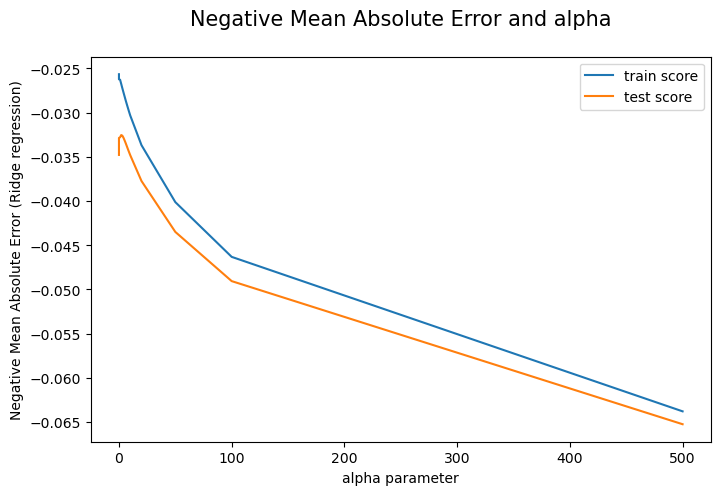

In [99]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [100]:
ridge_model_cv.best_params_

{'alpha': 2.0}

In [101]:
# Hyperparameter
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-3.17967610e-02,  9.05550045e-03,  5.92916073e-02,  1.25994270e-01,
        8.23833285e-02,  5.66514512e-02,  1.33500387e-02,  2.17262430e-02,
        6.10451525e-02,  1.15644383e-01, -7.38646114e-03,  2.53576475e-02,
        3.81058198e-02,  3.15312741e-02,  2.15422429e-02,  1.51334995e-03,
        3.03515453e-03,  1.30698577e-01,  3.64390139e-02,  3.17612274e-02,
       -5.73952915e-02, -1.21580659e-02, -2.29842705e-02,  3.30642886e-02,
       -2.83980346e-03,  2.41469009e-02,  6.49594042e-03, -9.84399051e-04,
       -7.08506229e-03,  3.88540731e-04,  1.55933584e-02, -1.93308154e-02,
       -4.78875346e-03,  1.23594188e-02, -1.82363409e-02, -1.17111022e-02,
       -1.10297794e-03,  0.00000000e+00,  1.28597548e-02,  1.21686577e-02,
       -2.15583638e-02, -2.01707566e-02,  4.79498774e-02, -3.43749938e-02,
       -2.91309979e-02, -1.41715883e-04, -3.04630039e-03, -3.85114187e-02,
       -2.51551627e-02,  2.00374655e-02, -2.48499063e-02,  1.38714458e-02,
        4.02095549e-02, -

In [102]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.0029734556090837026


In [105]:
# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data: ",r2_train)

The r2 value of train data:  0.9302888220931927


In [106]:
#predicting the R2 value of test data
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data: ",r2_test)

The r2 value of test data:  0.8967004192558862


In [107]:
# Lets observe the porameters by changing +1 and -1 of the alpha value
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print("---------------------------------------------------")

alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print("---------------------------------------------------")

alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.0029871558953406593
The r2 value of train data is  0.9302888220931927
The r2 value of test data is  0.8967004192558862
---------------------------------------------------
The output when alpha is 2: 
The mean squared error value is  0.0029734556090837026
The r2 value of train data is  0.9302888220931927
The r2 value of test data is  0.8967004192558862
---------------------------------------------------
The output when alpha is 3: 
The mean squared error value is  0.002992965519536927
The r2 value of train data is  0.9302888220931927
The r2 value of test data is  0.8967004192558862


#### Observation :-

As we can clearly the that the mean square error is slightly increasing with the increase or decrease of alpha value, so we can consider alpha = 2 as the best value

In [108]:
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0335
1              LotFrontage       0.0114
2                  LotArea       0.0556
3              OverallQual       0.1177
4              OverallCond       0.0762
..                     ...          ...
183  SaleCondition_AdjLand       0.0140
184   SaleCondition_Alloca       0.0076
185   SaleCondition_Family      -0.0033
186   SaleCondition_Normal       0.0178
187  SaleCondition_Partial       0.0243

[188 rows x 2 columns]

In [109]:
# dictionary of Features and Coefficients

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0335,
 'LotFrontage': 0.0114,
 'LotArea': 0.0556,
 'OverallQual': 0.1177,
 'OverallCond': 0.0762,
 'YearBuilt': 0.0517,
 'MasVnrArea': 0.0151,
 'BsmtUnfSF': 0.022,
 'TotalBsmtSF': 0.0593,
 'GrLivArea': 0.1089,
 'BedroomAbvGr': -0.0039,
 'TotRmsAbvGrd': 0.0288,
 'Fireplaces': 0.0399,
 'GarageCars': 0.0316,
 'GarageArea': 0.0242,
 'MoSold': 0.0018,
 'YrSold': 0.003,
 'Total_sqr_footage': 0.1259,
 'Total_Bathrooms': 0.0373,
 'Total_porch_sf': 0.0323,
 'Total_Age': -0.0524,
 'Garage_age': -0.0123,
 'Remodel_age': -0.0248,
 'MSZoning_FV': 0.0288,
 'MSZoning_RH': -0.0047,
 'MSZoning_RL': 0.0224,
 'MSZoning_RM': 0.0041,
 'LotShape_IR2': 0.0,
 'LotShape_IR3': -0.0058,
 'LotShape_Reg': -0.0001,
 'LandContour_HLS': 0.0164,
 'LandContour_Low': -0.0171,
 'LandContour_Lvl': -0.0043,
 'LotConfig_CulDSac': 0.0134,
 'LotConfig_FR2': -0.0175,
 'LotConfig_FR3': -0.009,
 'LotConfig_Inside': -0.001,
 'Neighborhood_Blueste': 0.0,
 'Neighborhood_BrDale': 0.0111,
 'Neighborhood_BrkSide': 0.

In [110]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [111]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
3   Total_sqr_footage         True            1       0.1259
0         OverallQual         True            1       0.1177
1           YearBuilt         True            1       0.0517
18      GarageQual_TA         True            1       0.0090
16      GarageQual_Gd         True            1       0.0078
2              YrSold         True            1       0.0030
14  GarageFinish_none         True            1       0.0017
13    GarageType_none         True            1       0.0017
19    GarageQual_none         True            1       0.0017
9   Exterior2nd_Other         True            1       0.0000

### Lasso - Regularization

In [112]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
# displaying the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.027405        -0.032575                1
1       0.0002         -0.028461        -0.032893                2
2       0.0003         -0.029389        -0.033556                3
3       0.0004         -0.030157        -0.034203                4
4       0.0005         -0.030912        -0.034915                5
5        0.001         -0.034779        -0.038536                6
6        0.002         -0.040724        -0.043832                7
7        0.003         -0.045163        -0.047623                8
8        0.004         -0.049239        -0.051493                9
9        0.005         -0.052935        -0.054948               10
10        0.01         -0.067638        -0.068908               11

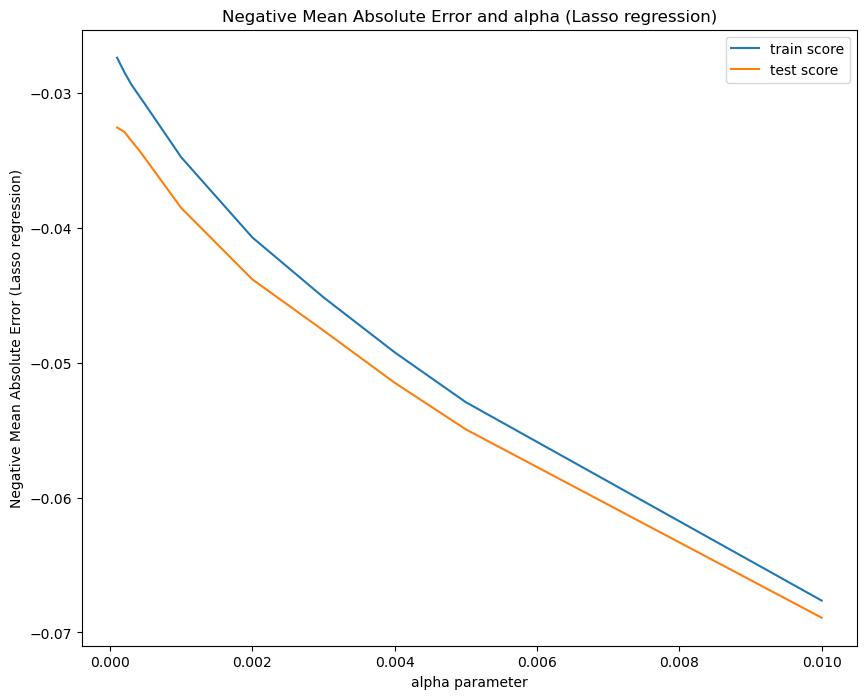

In [114]:
# plotting Negative Mean Absolute Error vs alpha for train and test
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [115]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [116]:
# Hyperparameter

alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-4.13091980e-02,  2.39712536e-03,  5.98224831e-02,  1.63094346e-01,
        9.45851168e-02,  1.34530587e-01,  8.50328403e-03,  0.00000000e+00,
        9.23422738e-02,  1.54868528e-01, -0.00000000e+00,  0.00000000e+00,
        3.28587048e-02,  3.99528716e-02,  5.35002687e-03, -0.00000000e+00,
        5.80287919e-04,  1.18840756e-01,  2.00076230e-02,  3.04017317e-02,
       -0.00000000e+00, -1.14126555e-02, -1.92698658e-02,  2.42601692e-02,
       -1.93002871e-03,  1.64501884e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.68131827e-04,  1.39926045e-02, -1.04899681e-02,
       -0.00000000e+00,  1.16597554e-02, -1.31256794e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.21374220e-02,
       -1.04611187e-02, -1.57469795e-02,  4.99967554e-02, -2.76817934e-02,
       -2.27548023e-02,  0.00000000e+00,  0.00000000e+00, -3.83575584e-02,
       -2.18812123e-02,  8.86479383e-03, -2.23855579e-02,  7.55413116e-03,
        4.25988667e-02, -

In [117]:
# mse
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.0027974117165619006


In [118]:
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.927529179409694
The r2 value of train data is  0.927529179409694


In [119]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.9028162866777872


In [120]:
# house_pricing_lasso: Features and coefficienst of Lasso
house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0               MSSubClass      -0.0413
1              LotFrontage       0.0024
2                  LotArea       0.0598
3              OverallQual       0.1631
4              OverallCond       0.0946
..                     ...          ...
106            SaleType_WD      -0.0036
107  SaleCondition_AdjLand       0.0023
108   SaleCondition_Family      -0.0009
109   SaleCondition_Normal       0.0146
110  SaleCondition_Partial       0.0319

[111 rows x 2 columns]

In [121]:
# dictionary of Features and Coefficients
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.041309198046057254,
 'LotFrontage': 0.002397125362653959,
 'LotArea': 0.05982248308481457,
 'OverallQual': 0.163094346122363,
 'OverallCond': 0.09458511678744735,
 'YearBuilt': 0.13453058691029596,
 'MasVnrArea': 0.008503284030435444,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.09234227380381846,
 'GrLivArea': 0.15486852784997102,
 'BedroomAbvGr': -0.0,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.03285870476756268,
 'GarageCars': 0.03995287156697287,
 'GarageArea': 0.005350026866680789,
 'MoSold': -0.0,
 'YrSold': 0.0005802879191787157,
 'Total_sqr_footage': 0.11884075634936948,
 'Total_Bathrooms': 0.020007623025693068,
 'Total_porch_sf': 0.03040173169826186,
 'Total_Age': -0.0,
 'Garage_age': -0.011412655451074886,
 'Remodel_age': -0.01926986583780958,
 'MSZoning_FV': 0.02426016918517092,
 'MSZoning_RH': -0.0019300287111449401,
 'MSZoning_RL': 0.016450188359728234,
 'MSZoning_RM': 0.0,
 'LotShape_IR2': -0.0,
 'LotShape_IR3': -0.0,
 'LotShape_Reg': 0.000268131826577036,
 'LandCon

In [122]:
# RFE : minimising features to 20
X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [123]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
1            OverallQual         True            1     0.163094
5              GrLivArea         True            1     0.154869
3              YearBuilt         True            1     0.134531
7      Total_sqr_footage         True            1     0.118841
11  Neighborhood_StoneBr         True            1     0.096971
2            OverallCond         True            1     0.094585
4            TotalBsmtSF         True            1     0.092342
0                LotArea         True            1     0.059822
8   Neighborhood_Crawfor         True            1     0.049997
10  Neighborhood_NridgHt         True            1     0.042599

In [124]:
#lets predict the R-squared value of test
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9028162866777872


## Conclusion :-

The optimal value of Lambda we got in case of Ridge and Lasso is :
- Ridge - **2.0**
- Lasso - **0.0001**

The r2 value we got in case of Ridge and Lasso:
- Ridge 
    - Train = **0.930** , Test = **0.896**
- Lasso
    - Train = **0.927** , Test = **0.902**

The Mean Squared error in case of Ridge and Lasso is:
- Ridge - **0.00297**
- Lasso - **0.00280**

- Mean Squared Error of Lasso is slightly lower than that of Ridge.
- Also since Lasso helps in feature reduction (as the coefficient value of one of the lasso's feature to be shrunk toward 0) and helps to increase model interpretation by taking the magnitude of the coefficients thus **Lasso has a better edge over Ridge.**

### LASSO Regularization TOP 5 Predicted variables are :

1. **OverallQual** - With the increase of the overall material and finish of the house, the house price also increases.
2. **GrLivArea** - With the increase of size of the living area square feet, the house price also increases.
3. **YearBuild** - With the increase of age of the house, the price gradually increases. 
4. **Total_sqr_footage** - With the increase of the overall square feet of the house, the house price also increases.
5. **Neighborhood_StoneBr** - Depending upon the Stone Brook location, the house price also increases.

## Assignment Part - II ( Finding solutions for the subjective questions. PDF file has the complete answers)  


**Question 1** : What is the optimal value of alpha for ridge and lasso regression? **What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?** What will be the most important predictor variables after the change is implemented?

In [126]:
#Lets find for Ridge first
alpha = 2.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 4.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 4: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 2: 
The mean squared error value is  0.0029734556090837026
The r2 value of train data is  0.927529179409694
The r2 value of test data is  0.9028162866777872

The output when alpha is 4: 
The mean squared error value is  0.0030267681618851737
The r2 value of train data is  0.927529179409694
The r2 value of test data is  0.9028162866777872


In [127]:
#Let's create a ridge model with alpha  = 4.0
ridge_doubled = Ridge(alpha = 4.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 4 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 4 are :

                      Coefficient
Total_sqr_footage        0.121636
OverallQual              0.111001
GrLivArea                0.103918
Neighborhood_StoneBr     0.080427
OverallCond              0.071092
TotalBsmtSF              0.057602
LotArea                  0.052836
YearBuilt                0.047895
Neighborhood_Crawfor     0.046547
Fireplaces               0.041275


In [128]:
#Now lets calculate for Lasso
alpha = 0.0001
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0001: ")

mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value : ",mse)

y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data : ",r2_train)

y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data : ",r2_test)
print("----------------------------------------------------")

alpha = 0.0002
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_
print("The output when alpha is 0.0002: ")

mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value : ",mse)

y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data : ",r2_train)

y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data : ",r2_test)

The output when alpha is 0.0001: 
The mean squared error value :  0.0027974117165619006
The r2 value of train data :  0.927529179409694
The r2 value of test data :  0.9028162866777872
----------------------------------------------------
The output when alpha is 0.0002: 
The mean squared error value :  0.0032780109729978702
The r2 value of train data :  0.9227869910665729
The r2 value of test data :  0.8861199884232903


In [129]:
#Let's create a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0002 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0002 are:

                      Coefficient
Total_sqr_footage        0.185432
OverallQual              0.172690
YearBuilt                0.119993
GrLivArea                0.105463
Neighborhood_StoneBr     0.093874
OverallCond              0.089137
LotArea                  0.054712
Neighborhood_Crawfor     0.053322
Neighborhood_NridgHt     0.047466
GarageCars               0.044402


**Question 3** :After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [130]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 715 to 900
Columns: 188 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(165)
memory usage: 314.5 KB


In [131]:
#dropping the top 5 most important predictor variables in the lasso model 
drop_cols = ['OverallQual','GrLivArea','YearBuilt','Total_sqr_footage','Neighborhood_StoneBr']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(902, 183)
(388, 183)


In [132]:
#Let's create a lasso model with alpha  = 0.0001
lasso_doubled = Lasso(alpha=0.0001)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top 5 correlated features when alpha is 0.0001 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features when alpha is 0.0001 are:

                 Coefficient
TotalBsmtSF         0.322970
TotRmsAbvGrd        0.126251
OverallCond         0.094274
Total_Bathrooms     0.086846
LotArea             0.067737
